In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets
circuits = pd.read_csv('archive/circuits.csv')
constructor_results = pd.read_csv('archive/constructor_results.csv')
constructor_standings = pd.read_csv('archive/constructor_standings.csv')
constructors = pd.read_csv('archive/constructors.csv')
driver_standings = pd.read_csv('archive/driver_standings.csv')
drivers = pd.read_csv('archive/drivers.csv')
lap_times = pd.read_csv('archive/lap_times.csv')
pit_stops = pd.read_csv('archive/pit_stops.csv')
qualifying = pd.read_csv('archive/qualifying.csv')
races = pd.read_csv('archive/races.csv')
results = pd.read_csv('archive/results.csv')
seasons = pd.read_csv('archive/seasons.csv')
sprint_results = pd.read_csv('archive/sprint_results.csv')
status = pd.read_csv('archive/status.csv')

In [3]:
# Merge data to get driver standings by year
driver_performance = pd.merge(driver_standings, drivers, on='driverId')
driver_performance = pd.merge(driver_performance, races, on='raceId')

In [4]:
# Ensure we're selecting only the required columns from the 'results' DataFrame
results_subset = results[['raceId', 'driverId', 'constructorId']]

# Rename constructorId in results_subset to avoid conflicts
results_subset = results_subset.rename(columns={'constructorId': 'constructorId_results'})

# Merge with results to get constructorId
driver_performance = pd.merge(driver_performance, results_subset, on=['raceId', 'driverId'])

# Merge with constructors to get the constructor (team) name
constructors_subset = constructors[['constructorId', 'name']].rename(columns={'name': 'team_name'})
driver_performance = pd.merge(driver_performance, constructors_subset, left_on='constructorId_results', right_on='constructorId')

# Drop the extra constructorId columns from the merge to clean up the DataFrame
driver_performance = driver_performance.drop(columns=['constructorId_results', 'constructorId'])

# Step 2: Filter data for the 2024 season
this_year_performance = driver_performance[driver_performance['year'] == 2024].copy()

In [5]:
# Step 3: Define custom colors for each team
custom_colors = {
    'Ferrari': '#FF0000',
    'Sauber': '#10d000',
    'Red Bull': '#0000FF',
    'McLaren': '#ff9c17',
    'Mercedes': '#60d69d',
    'Williams': '#00d8d1',
    'Alpine F1 Team': '#ff8ffa',
    'Aston Martin': '#229236',
    'RB F1 Team': '#bdd000',
    'Haas': '#000000',
}

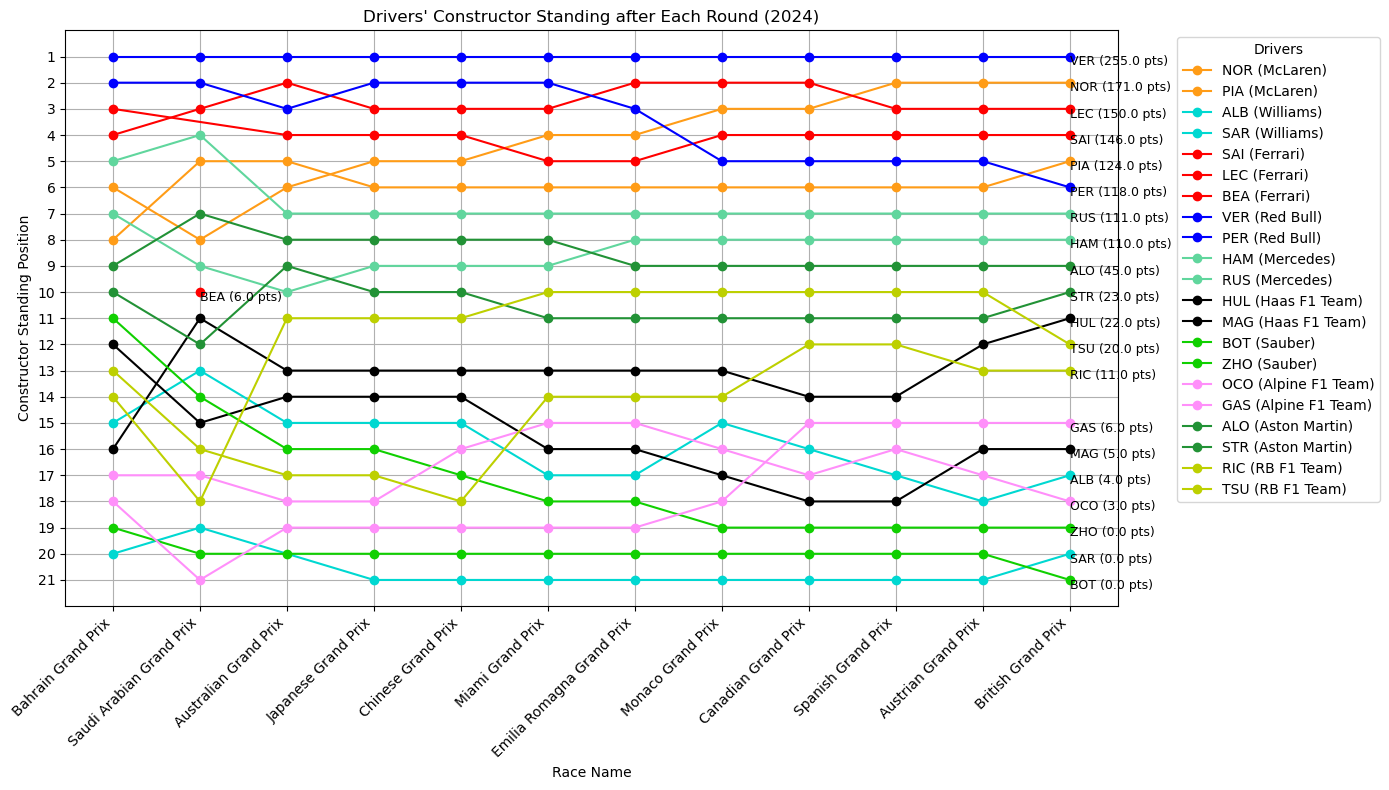

In [28]:
# Plotting
plt.figure(figsize=(14, 8))

# Loop through each driver code to plot their standings over rounds
for code in this_year_performance['code'].unique():
    driver_data = this_year_performance[this_year_performance['code'] == code]
    team = driver_data['team_name'].iloc[0]  # Get the team name for the driver
    
    # Plotting all points
    plt.plot(driver_data['name'], driver_data['position'], marker='o',
             label=f'{code} ({team})', color=custom_colors.get(team, '#000000'), linestyle='-')

    # Adding labels to the last point only, with offset to the right
    last_row = driver_data.iloc[-1]
    plt.text(
        x=last_row['name'], 
        y=last_row['position'] + 0.2,  # Offset label to avoid overlapping with the point
        s=f'{last_row["code"]} ({last_row["points"]} pts)', 
        fontsize=9, 
        ha='left', 
        va='center', 
        color='black'
    )

# Invert y-axis so 1st position is at the top
plt.gca().invert_yaxis()

# Set y-axis ticks to be every integer value
max_position = this_year_performance['position'].max()  # Find the maximum position
plt.yticks(range(1, max_position + 1))

# Adding labels and title
plt.xlabel('Race Name')
plt.ylabel('Constructor Standing Position')
plt.title('Drivers\' Constructor Standing after Each Round (2024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Drivers', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()